### Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

### Customize

In [5]:
# Define inputs
base_profits = {'A': 10, 'B': 11, 'C': 12}
max_supply = {'A': 10000, 'B': 8000, 'C': 7000}
total_supply = 20000

# Portfolio constraints
min_percentage = 0.30  
max_percentage = 0.50  

# Profit fluctuation scenarios (-5%, 0%, +5%)
fluctuations = [-0.10, 0, 0.10]

csv_file="0707 dynamic_allocation_results.csv"
plot_image="0707 Asset_allocation_histogram.png"

### Create computation function

In [7]:
#create the numebr of scenarios
scenarios = list(product(fluctuations, repeat=3))

# Create lower and upper limits
min_limit = total_supply * min_percentage  
max_limit = total_supply * max_percentage  

# Function to optimize allocation dynamically
def optimize_allocation(profits):
    allocation = {'A': 0, 'B': 0, 'C': 0}
    remaining_supply = total_supply
    
    # Sort products by profitability dynamically
    sorted_products = sorted(profits.keys(), key=lambda x: -profits[x])
    
    for product in sorted_products:
        if remaining_supply == 0:
            break
        max_possible = min(max_supply[product], max_limit, remaining_supply)
        min_possible = min_limit
        
        # Ensure each product meets at least the minimum constraint
        allocation[product] = max(min_possible, min(max_possible, remaining_supply))
        remaining_supply -= allocation[product]
    
    return allocation

### Compute initial and updated scenarios; Show management decision 

In [9]:
# Process each scenario
allocation_results = []
for i, scenario in enumerate(scenarios, start=1):
    adjusted_profits = {product: round(base_profits[product] * (1 + scenario[i]), 2) for i, product in enumerate(base_profits)}
    optimal_allocation = optimize_allocation(adjusted_profits)
    total_profit = sum(optimal_allocation[p] * adjusted_profits[p] for p in base_profits)
    allocation_results.append([
        i,  # Serial number starting from 1
        scenario[0], scenario[1], scenario[2],  # Profit fluctuations
        adjusted_profits['A'], adjusted_profits['B'], adjusted_profits['C'],  # Adjusted profits
        optimal_allocation['A'], optimal_allocation['B'], optimal_allocation['C'],  # Allocations
        total_profit  # Total profit
    ])


### Display and save results and histogram  

    Serial  Fluctuation A  Fluctuation B  Fluctuation C  Adjusted Profit A  \
0        1           -0.1           -0.1           -0.1                9.0   
1        2           -0.1           -0.1            0.0                9.0   
2        3           -0.1           -0.1            0.1                9.0   
3        4           -0.1            0.0           -0.1                9.0   
4        5           -0.1            0.0            0.0                9.0   
5        6           -0.1            0.0            0.1                9.0   
6        7           -0.1            0.1           -0.1                9.0   
7        8           -0.1            0.1            0.0                9.0   
8        9           -0.1            0.1            0.1                9.0   
9       10            0.0           -0.1           -0.1               10.0   
10      11            0.0           -0.1            0.0               10.0   
11      12            0.0           -0.1            0.1         

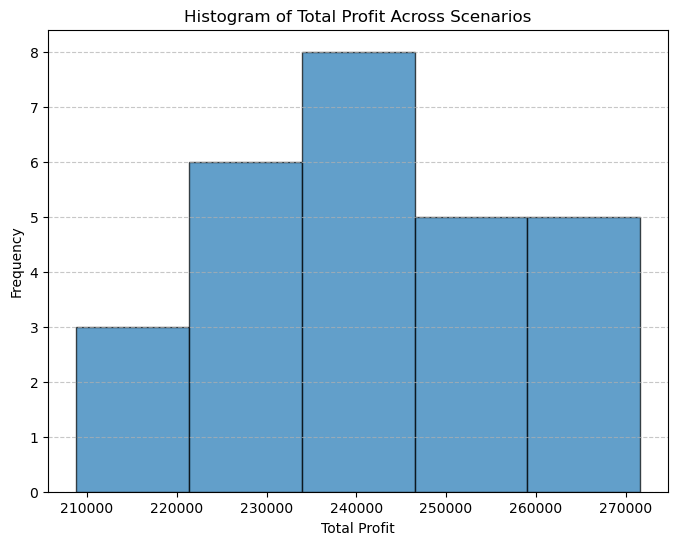

Histogram saved 0707 Asset_allocation_histogram.png


<Figure size 640x480 with 0 Axes>

In [11]:

# Convert results to DataFrame
df_results = pd.DataFrame(allocation_results, columns=[
    'Serial', 'Fluctuation A', 'Fluctuation B', 'Fluctuation C',
    'Adjusted Profit A', 'Adjusted Profit B', 'Adjusted Profit C',
    'Allocation A', 'Allocation B', 'Allocation C',
    'Total Profit'
])

# Display the results
print(df_results)

# Save to CSV
df_results.to_csv(csv_file, index=False)
print (f"Results saved to {csv_file}")

# Plot histogram of Total Profit
plt.figure(figsize=(8,6))
plt.hist(df_results['Total Profit'], bins=5, edgecolor='black', alpha=0.7)
plt.xlabel('Total Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Total Profit Across Scenarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Save plot as an image file
plt.savefig(plot_image, dpi=300)
print(f"Histogram saved {plot_image}")
plt.show()